Problem 1

In [9]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/5420/poly_data.csv',header=None)

X = np.array(data.iloc[:,0]).reshape(-1,1)
y = np.array(data.iloc[:,1]).reshape(-1,1)

In [10]:
X = np.concatenate([np.array([[1]*len(X)]).reshape(-1,1),X],axis=1)

In [3]:
def kfold(X,y,k):
  l=len(X)//k
  error=0
  for i in range(k):
    X_val = X[i*l:(i+1)*l]
    y_val = y[i*l:(i+1)*l]
    X_train = np.concatenate([X[:i*l],X[(i+1)*l:]])
    y_train = np.concatenate([y[:i*l],y[(i+1)*l:]])
    beta = (np.linalg.inv(X_train.T@X_train)@X_train.T)@y_train
    error += np.mean(np.square(y_val-X_val@beta))
  return error/k

In [12]:
dict1 = {}
X1 = X.copy()
index = list(range(len(X)))

for i in range(1,40):
  index = np.random.permutation(len(X))
  X1,y = X1[index],y[index]
  err = kfold(X1,y,7)
  dict1[i]=err
  X1=np.concatenate([X1,(X1[:,-1]*X1[:,1]).reshape(-1,1)],axis=1)

In [13]:
dict1

{1: 354.6053916739148,
 2: 283.6271596402905,
 3: 98.56863579147496,
 4: 104.74922385736288,
 5: 104.3829747364832,
 6: 100.89192738545024,
 7: 103.74135912964921,
 8: 112.43121903388251,
 9: 104.84115347528586,
 10: 101.29614850986044,
 11: 101.2439239788107,
 12: 121.55444623890405,
 13: 116.30864867257883,
 14: 123.98243725369137,
 15: 265.70205441999076,
 16: 602.5751036732098,
 17: 230.10280235806755,
 18: 138.50491498145206,
 19: 388.5842120483889,
 20: 210.20185289922568,
 21: 101.58638388362321,
 22: 3828.1514184846496,
 23: 3673.1950040007973,
 24: 6728.881894879406,
 25: 48217.38172385659,
 26: 38922.947406494015,
 27: 102143.26624068817,
 28: 49898.60828232503,
 29: 4127120.9814560423,
 30: 8991906.236526033,
 31: 7069741.537182749,
 32: 2669009.9207429215,
 33: 529092.9904356657,
 34: 1029093.9559864056,
 35: 51726171.46212105,
 36: 964797222.542781,
 37: 37122159.05492622,
 38: 14167967.994067747,
 39: 130570822.01346858}

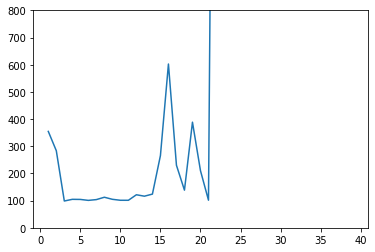

In [28]:
import matplotlib.pyplot as plt

plt.ylim((0,800))
plt.plot(list(dict1.keys()),list(dict1.values()))

i=3

In [22]:
X = np.array(data.iloc[:,0]).reshape(-1,1)
y = np.array(data.iloc[:,1]).reshape(-1,1)
X = np.concatenate([np.array([[1]*len(X)]).reshape(-1,1),X],axis=1)

In [23]:
X_new = X.copy()
for i in range(2,4):
  X_new = np.concatenate([X_new,(X_new[:,-1]*X[:,1]).reshape(-1,1)],axis=1)
X_new.shape

(121, 4)

In [24]:
beta = np.linalg.inv(X_new.T@X_new)@X_new.T@y
beta

array([[2.85471181],
       [0.95305882],
       [3.09176602],
       [3.09499544]])

In [26]:
y_pred = X_new@beta
y_pred.shape

(121, 1)

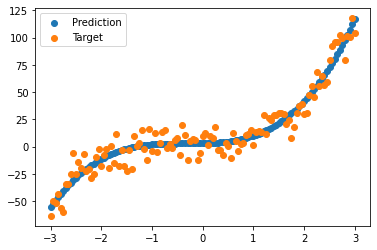

In [27]:
plt.scatter(X[:,1],y_pred,label='Prediction')
plt.scatter(X[:,1],y,label='Target')
plt.legend()

Problem4

In [ ]:
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people(min_faces_per_person=60)

In [ ]:
X_images = faces.data
y_names = faces.target
n_features = X_images.shape[1]
n_samples, h, w = faces.images.shape

print("Total dataset size:")
print("n_samples: %d" % len(y_names))
print("n_features: %d" % n_features)

Total dataset size:
n_samples: 1348
n_features: 2914


In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA

In [ ]:
pca = RandomizedPCA(n_components=150, svd_solver='randomized', whiten=True).fit(X_images)

In [ ]:
def plot_portraits(images, titles, h, w, n_row, n_col):
    """
    Plots portraits of images
    
    Args:
        images ((n,p) np.ndarray): The input images in a vector format
        titles (list string): The list of names for each image
        h (int): The input height of the portraits
        w (int): The input width of the portraits
        n_row (int): The number of rows to display of images
        n_col (int): The number of columns to display of images
    """  
    
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

(a)

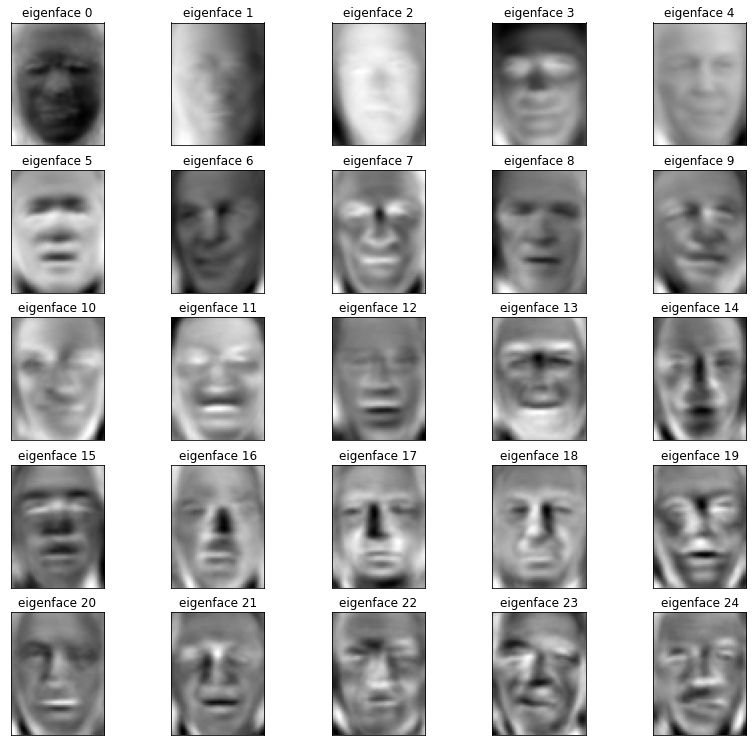

In [ ]:
eigenfaces = (pca.components_)[:25]
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 5, 5)

(b)

original faces

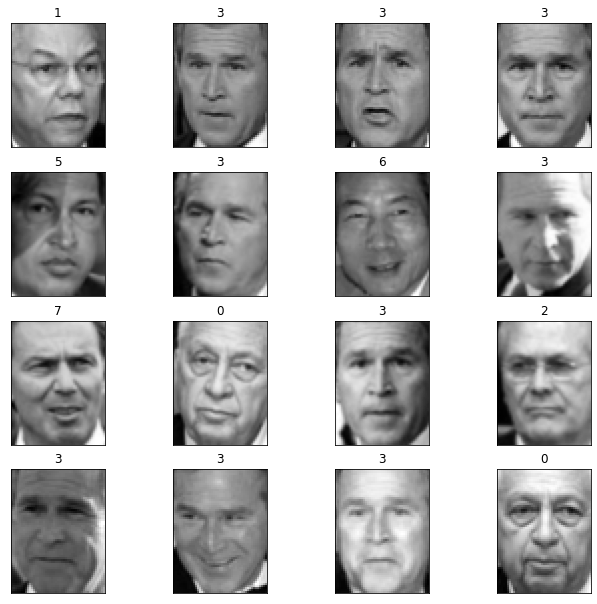

In [ ]:
plot_portraits(X_images[:16], y_names[:16], h, w, 4, 4)

reconstructed faces

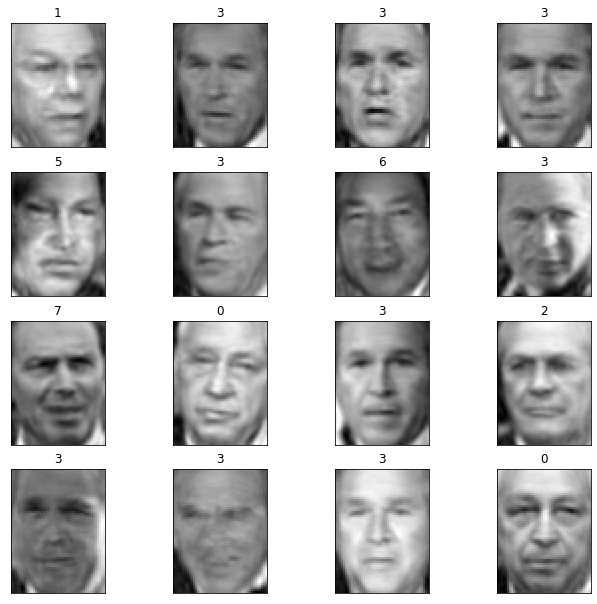

In [ ]:
plot_portraits((X_images[:16]@pca.components_.T@pca.components_), y_names[:16], h, w, 4, 4)